(8400,)
(33600,)
Using learning rate = 0.1, iterations = 3000
Starting one-hot encoding...
Running gradient descent...
Predicting on validation set...
Computing final accuracy...
Validation Accuracy: 89.38%
Displaying sample predictions...


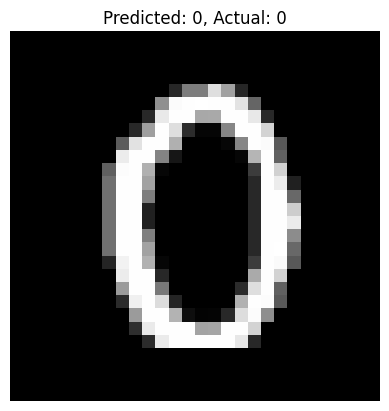

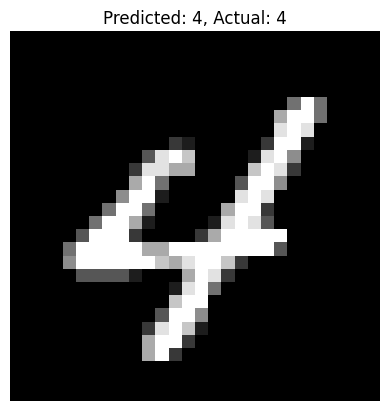

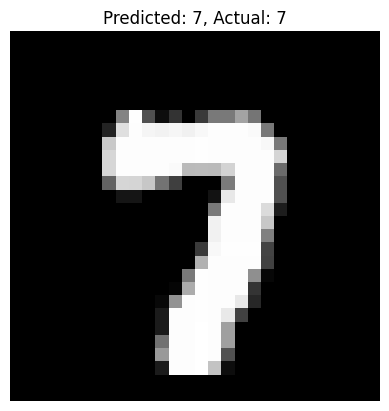

In [16]:
# Implementing a neural network from scratch
# Two layers: 10 neurons each (including input/output)
# Using tanh in hidden layer, softmax in output
# Classifying MNIST images (28x28 grayscale => 784 features)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)  # Shuffle data before splitting

# Split into training and validation sets (80/20 split)
train_data = data[0:int(0.8 * m), :]
val_data = data[int(0.8 * m):m, :]

# Normalize input data and extract labels
x_train = train_data[:, 1:].T / 255.0
y_train = train_data[:, 0]
x_val = val_data[:, 1:].T / 255.0
y_val = val_data[:, 0]

print(y_val.shape)
print(y_train.shape)

def softmax(z):
    """
    Applies softmax activation to output layer.
    Converts logits into probability distribution.
    """
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def tanh(x):
    """
    Applies tanh activation function (hidden layer).
    """
    return np.tanh(x)

def initialise_parameters():
    """
    Initializes weights and biases for two-layer neural network.
    Returns:
        W1, B1: Weights and biases for hidden layer
        W2, B2: Weights and biases for output layer
    """
    W1 = np.random.rand(10, 784) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    return W1, B1, W2, B2

def forward_pass(W1, B1, W2, B2, X):
    """
    Performs a forward pass through the network.
    Returns:
        Z1, A1: Linear and activation output for hidden layer
        Z2, A2: Linear and activation output for output layer
    """
    Z1 = W1 @ X + B1
    A1 = tanh(Z1)
    Z2 = W2 @ A1 + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def tanh_derivative(x):
    """
    Derivative of the tanh activation function.
    """
    return 1 - np.tanh(x)**2

def backward_pass(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
    """
    Performs backpropagation to compute gradients.
    Returns:
        Gradients dW1, dB1, dW2, dB2
    """
    m = X.shape[1]
    dtanh = tanh_derivative(Z1)
    dZ2 = A2 - Y
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * dtanh
    dW1 = (1/m) * dZ1 @ X.T
    dB1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    dW2 = (1/m) * (dZ2 @ A1.T)
    dB2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
    """
    Updates parameters using gradient descent.
    """
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    B2 = B2 - learning_rate * dB2
    return W1, B1, W2, B2

def one_hot_converter(y_train, y_val):
    """
    Converts integer labels to one-hot encoded format.
    """
    one_hot_y_val = np.zeros((10, len(y_val)))
    one_hot_y_train = np.zeros((10, len(y_train)))
    for i in range(len(y_train)):
        label = y_train[i]
        one_hot_y_train[label, i] = 1
    for i in range(len(y_val)):
        label = y_val[i]
        one_hot_y_val[label, i] = 1
    return one_hot_y_train, one_hot_y_val

def gradient_descent(X, Y, learning_rate, iterations, x_val=None, y_val=None, log_interval=50):
    """
    Trains the neural network using gradient descent.
    Returns:
        Trained parameters W1, B1, W2, B2
    """
    W1, B1, W2, B2 = initialise_parameters()
    val_acc_history = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backward_pass(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
        W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate)

    if x_val is not None and y_val is not None and i % log_interval == 0:
            val_preds = predict(x_val, W1, B1, W2, B2)
            acc = accuracy(val_preds, y_val)
            val_acc_history.append((i, acc))
            print(f"Iteration {i}: Validation Accuracy = {acc * 100:.2f}%")
           
    return W1, B1, W2, B2, val_acc_history

def predict(X, W1, B1, W2, B2):
    """
    Performs prediction on input X using trained parameters.
    Returns:
        Array of predicted labels.
    """
    Z1, A1, Z2, A2 = forward_pass(W1, B1, W2, B2, X)
    predictions = np.argmax(A2, axis=0)
    return predictions

def accuracy(predictions, y_val):
    """
    Computes accuracy between predictions and true labels.
    """
    correct = np.sum(predictions == y_val)
    total = len(y_val)
    acc = correct / total
    return acc



def main():
    
    
    learning_rate = 0.1
    iterations = 3000
    log_interval = 50

    print(f"Using learning rate = {learning_rate}, iterations = {iterations}")

    print("Starting one-hot encoding...")
    one_hot_y_train, one_hot_y_val = one_hot_converter(y_train, y_val)

    print("Running gradient descent...")
    W1, B1, W2, B2, acc_history = gradient_descent(
        x_train, one_hot_y_train,
        learning_rate=learning_rate,
        iterations=iterations,
        x_val=x_val, y_val=y_val,
        log_interval=log_interval
    )

    print("Predicting on validation set...")
    val_predictions = predict(x_val, W1, B1, W2, B2)

    print("Computing final accuracy...")
    val_acc = accuracy(val_predictions, y_val)
    print(f"Validation Accuracy: {val_acc * 100:.2f}%")

    # Plot accuracy history
    if acc_history:
        iters, accs = zip(*acc_history)
        plt.plot(iters, [a * 100 for a in accs])
        plt.xlabel("Iteration")
        plt.ylabel("Validation Accuracy (%)")
        plt.title("Validation Accuracy Over Time")
        plt.grid(True)
        plt.show()

    print("Displaying sample predictions...")
    for i in range(3):
        idx = np.random.randint(0, x_val.shape[1])
        img = x_val[:, idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {val_predictions[idx]}, Actual: {y_val[idx]}")
        plt.axis('off')
        plt.show()


if __name__ == "__main__":
    main()

